In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/ul-pfe-ns.csv')

In [3]:
# df.columns

In [4]:
# df.head()

In [5]:
df.shape

(1972, 80)

In [6]:
# df.info()

In [7]:
X = df.drop('throughput',axis=1)

In [8]:
X.shape

(1972, 79)

In [9]:
y = df['throughput']

In [10]:
y.shape

(1972,)

In [11]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.svm import SVR
model = SVR()
model

SVR()

In [13]:
model.fit(X_train, y_train)

SVR()

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [16]:
mae

4.97266491209712

In [17]:
mse

37.45431011787757

In [18]:
rmse

6.119992656684938

In [19]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['SVR'])
err_df

,SVR
MAE,4.972665
MSE,37.454310
RMSE,6.119993


In [20]:
err_df.to_csv('./baseline-test-err/svr-test-err.csv')

In [21]:
y_pred_df = pd.DataFrame(y_pred, columns=['throughput_pred'])
y_pred_df.describe().drop('count')
# no negative predictions

,throughput_pred
mean,19.081109
std,5.173600
min,7.324958
25%,15.538044
50%,18.689655
75%,23.106293
max,32.051585


<AxesSubplot:ylabel='Count'>

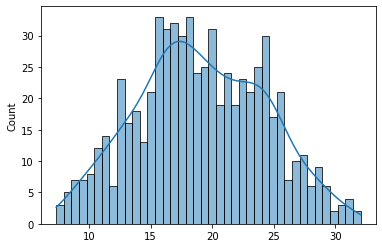

In [22]:
sns.histplot(y_pred,bins=40,kde=True)
# the distribution better reflects the true distribution of the data set

In [23]:
res = y_test - y_pred
res.describe().drop('count')

mean    -0.915293
std      6.055814
min    -20.233535
25%     -5.177990
50%     -0.403955
75%      3.466787
max     14.640833
Name: throughput, dtype: float64

<AxesSubplot:xlabel='throughput', ylabel='Count'>

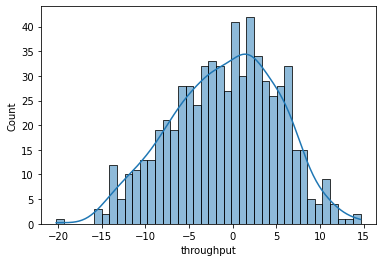

In [24]:
sns.histplot(data=res, kde=True,bins=40)

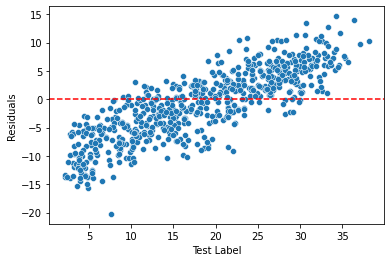

In [25]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Label')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot
# we see a positive correlation between Test Label and Residuals -> later models should avoid this pattern

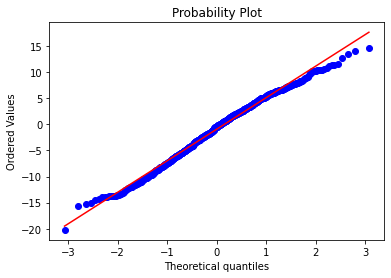

In [26]:
import scipy as sp

fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

In [27]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

X_svr = scaler.transform(X)

svr_model = SVR()
svr_model.fit(X_svr,y)

SVR()

In [28]:
y_pred_svr = svr_model.predict(X_svr)

<AxesSubplot:ylabel='Count'>

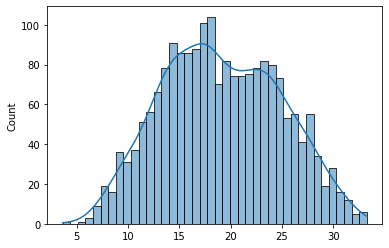

In [29]:
sns.histplot(y_pred_svr,bins=40,kde=True)

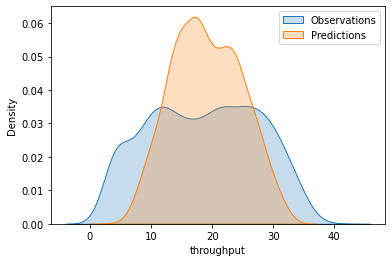

In [30]:
fig,ax = plt.subplots()

sns.kdeplot(y, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred_svr, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

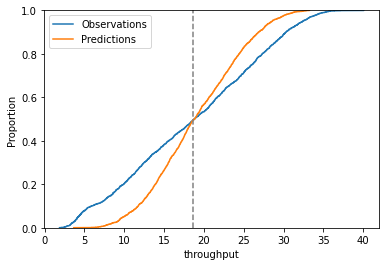

In [31]:
fig,ax = plt.subplots()

sns.ecdfplot(y, ax=ax, label='Observations')
sns.ecdfplot(y_pred_svr, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [32]:
mae = mean_absolute_error(y,y_pred_svr)
mse = mean_squared_error(y,y_pred_svr)
rmse = np.sqrt(mse)

In [33]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['SVR'])
err_df

,SVR
MAE,4.416056
MSE,30.977009
RMSE,5.565699


In [34]:
# err_df.to_csv('./model-err/svr-model-err.csv')

In [35]:
from joblib import dump, load
dump(svr_model, './baseline-models/svr-model.joblib')

['./baseline-models/svr-model.joblib']

DONE!